importing libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

dataset generation

In [3]:
cifar100 = tf.keras.datasets.cifar100

# train and test set splitting
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

169001437/169001437 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
x_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


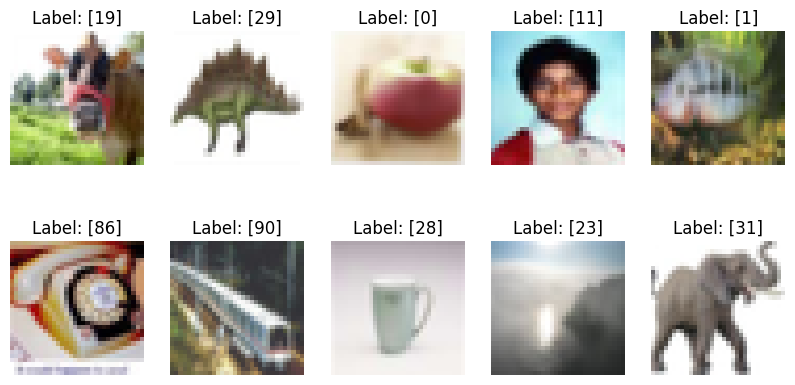

In [6]:
#from keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display the shape of the dataset
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

# Plot some sample images
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


In [7]:
# Normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# flattening
y_train, y_test = y_train.flatten(), y_test.flatten()

visualization

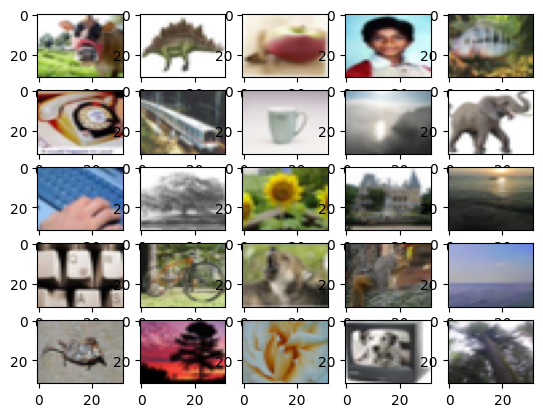

In [8]:
# plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(x_train[k], aspect='auto')
		k += 1

plt.show()

#Model

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100

#118,96,64,
#132,84,156,
#128,102,54,96

# Build the CNN model
model = tf.keras.models.Sequential()

# Layer 1: Convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
model.add(layers.Conv2D(118, (3, 3), activation='relu', input_shape=(32, 32, 3)))


# Layer 2: Convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
model.add(layers.Conv2D(96, (3, 3), activation='relu'))

# Layer 3: Convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Layer 4: Convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
model.add(layers.Conv2D(132, (3, 3), activation='relu'))

# Layer 5: Convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
model.add(layers.Conv2D(84, (3, 3), activation='relu'))

# Layer 6: Convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
model.add(layers.Conv2D(156, (3, 3), activation='relu'))

# Layer 7: Convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# Layer 8: Convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
model.add(layers.Conv2D(102, (3, 3), activation='relu'))

# Layer 9: Convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
model.add(layers.Conv2D(54, (3, 3), activation='relu'))

# Layer 10: Convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
model.add(layers.Conv2D(96, (3, 3), activation='relu'))

# Layer 11: Convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
#model.add(layers.Conv2D(861, (3, 3), activation='relu'))

# Layer 12: Convolutional layer with 128 filters, 3x3 kernel size, and ReLU activation
#model.add(layers.Conv2D(956, (3, 3), activation='relu'))


# Flatten the output for the fully connected layers
model.add(layers.Flatten())


# Layer 5: Output layer with 10 neurons (for 10 classes in MNIST) and softmax activation
model.add(layers.Dense(100, activation='softmax'))

# Train the model
#model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 118)       3304      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 96)        102048    
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        55360     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 132)       76164     
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 84)        99876     
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 156)       118092    
                                                                 
 conv2d_6 (Conv2D)           (None, 18, 18, 128)       1

In [10]:
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])

Training

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(x_test, y_test),
			steps_per_epoch=steps_per_epoch, epochs=2,callbacks=[EarlyStopping(monitor="val_accuracy",patience=7,verbose=1)])

Epoch 1/2
1562/1562 [==============================] - 50s 27ms/step - loss: 4.6063 - accuracy: 0.0086 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 2/2
1562/1562 [==============================] - 40s 26ms/step - loss: 4.6059 - accuracy: 0.0088 - val_loss: 4.6052 - val_accuracy: 0.0100


Prediction

In [12]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 2s 7ms/step - loss: 4.6052 - accuracy: 0.0100
Test Accuracy: 1.00%


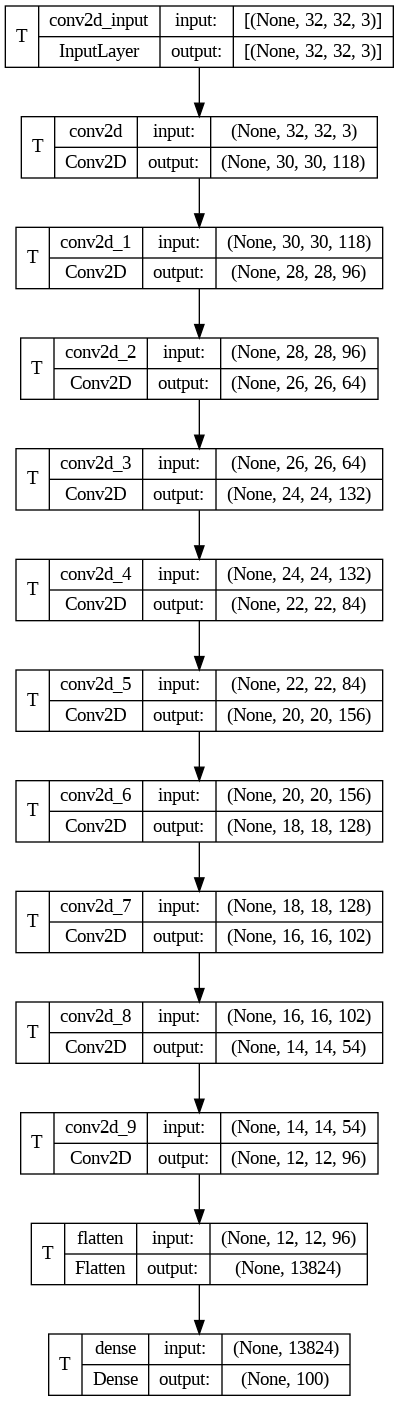

In [13]:
tf.keras.utils.plot_model(model, show_shapes=True, show_trainable=True)

In [14]:
for layer in model.layers:
  print(layer.get_weights())

[array([[[[-0.05220267, -0.02290479,  0.04545937, ..., -0.03623894,
           0.02701663,  0.04204101],
         [-0.02218431,  0.06674092, -0.0733153 , ..., -0.0331087 ,
           0.05064542, -0.02738102],
         [-0.00614872,  0.03111655, -0.02265622, ..., -0.05414162,
          -0.03118214, -0.05410797]],

        [[ 0.007988  , -0.0393768 ,  0.04854449, ..., -0.00579366,
          -0.04228701,  0.02596377],
         [ 0.0130282 , -0.02741382, -0.01364741, ..., -0.02092058,
           0.04333043,  0.0468169 ],
         [-0.09226489, -0.07445411,  0.01050582, ..., -0.02974358,
          -0.04300024, -0.03560005]],

        [[-0.08584636,  0.043358  , -0.07039787, ...,  0.02135421,
           0.04660675, -0.00553352],
         [ 0.05748972, -0.06003718, -0.06413879, ...,  0.04540129,
           0.00756019,  0.04154184],
         [ 0.04491212, -0.0596729 , -0.04677048, ..., -0.06186324,
          -0.05207069, -0.06575419]]],


       [[[ 0.05706915,  0.02971572, -0.06076629, ...,  

In [15]:
b = 8
alpha_q = -2**(b-1)
beta_q = (2**(b-1) - 1)
print(alpha_q)
print(beta_q)
for layer in model.layers:
  #print(layer.name)
  if layer.name!='flatten':
    #print("yes")
    #print(layer.get_weights())
    (W,B) = np.array(layer.get_weights())
    #print("bias of", layer.name,B)
    alpha_W = np.min(W)
    beta_W = np.max(W)
    alpha_B = np.min(B)
    beta_B = np.max(B)
    s_W = (beta_W - alpha_W) / (beta_q - alpha_q)
    s_B = (beta_B - alpha_B) / (beta_q - alpha_q)
    z_W = np.round((beta_W*alpha_q - alpha_W*beta_q)/(beta_W - alpha_W))
    z_B = np.round((beta_B*alpha_q - alpha_B*beta_q)/(beta_W - alpha_W))
    #print(W)
    #print(B)
    W1 = np.round(( (W / s_W) + z_W), decimals=0)
    B1 = np.round(( (B / s_B) + z_B), decimals=0)
    #print(W1)
    #print(B1)
    W2 = np.clip(W1, alpha_q, beta_q)
    B2 = np.clip(B1, alpha_q, beta_q)
    #print(W2)
    #print(B2)
    W_quantized = W2.astype('int')
    B_quantized = B2.astype('int')
    #print(W_quantized)
    #print(B_quantized)
    Dist = [W_quantized, B_quantized]
    #print(Dist)
    layer = layer.set_weights(Dist)

-128
127


<ipython-input-15-a41dd8c9f520>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  (W,B) = np.array(layer.get_weights())


In [16]:
(W,B) = np.array(model.layers[1].get_weights())

<ipython-input-16-f62bcb098c90>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  (W,B) = np.array(model.layers[1].get_weights())


In [17]:
W = W.flatten()
W

array([ 83., -37., 100., ...,  -3.,  19., -43.], dtype=float32)

In [18]:
B.flatten()
B

array([  -8.,  -32.,  -50.,   -1.,  -49.,  -69.,  -47.,   -8.,  -94.,
        -18.,  -24.,  -41.,  -44., -128.,  -35.,  -55.,  -34.,  -93.,
       -121.,  -37.,  -62.,  -27.,  -42.,  -25.,  -29.,  -26.,  -55.,
       -115.,  -59.,  -30.,  -41.,   -1.,   21.,  -22.,  -32.,  -23.,
          0.,  -37.,  -17.,   98., -100.,  -45.,  -47.,  -54.,  -20.,
        -27.,   63.,   13.,   -3.,  -33.,  -36.,  115.,   10.,  -47.,
        -28.,  -32.,  -43.,  -47.,  -41., -101.,   -7., -115.,   54.,
         62.,   38.,  -39.,  -17., -119.,   20.,  -33.,  -25.,  -35.,
        -34.,  -32.,   77.,  -19.,  -23.,  -47.,  -32.,  -41.,  -16.,
        -24., -106.,  -27.,  -27.,  -17.,  -27.,  -13.,  -40.,  -16.,
        -25., -108.,  -41.,  -34.,  -31.,  -28.], dtype=float32)

In [19]:
with open('weight_data.txt', 'w') as file:
  for layer in model.layers:
    if layer.name!='flatten':
      file.write(f"Layer Name: {layer.name}\n")
      file.write(f"Layer Shape: {layer.output_shape}\n")
      (W,B) = np.array(layer.get_weights())
      file.write(f"Layer weights: {W.flatten()}\n")
      file.write(f"Layer bias: {B.flatten()}\n")
      file.write("\n")


<ipython-input-19-5e10c67aed42>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  (W,B) = np.array(layer.get_weights())
